In [84]:
import numpy as np
from os.path import join as pjoin
import hypertools as hyp
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
# load data from run1 as training run
results_dir = '/data/BnB_USER/oliver/somato/scratch/crossval_projection'
proj_data_run1train_npy = pjoin(results_dir, 'proj_run1_is_train.npy')
trained_srms_run1train_npy = pjoin(results_dir, 'trainedsrms_run1_is_train.npy')

with open(proj_data_run1train_npy, 'rb') as inf:
    proj_data_run1train = np.load(inf)
with open(trained_srms_run1train_npy, 'rb') as inf:
    trained_srms_run1train = np.load(inf)

In [86]:
# make lists of data frames for hypertools plotting

projected_dfs = []
trained_srms_dfs = []

for sub_idx in range(proj_data_run1train.shape[0]):
    df = pd.DataFrame(proj_data_run1train[sub_idx].T)
    projected_dfs.append(df)
    srm_df = pd.DataFrame(trained_srms_run1train[sub_idx].T)
    trained_srms_dfs.append(srm_df)

# Example first subject (first run training)

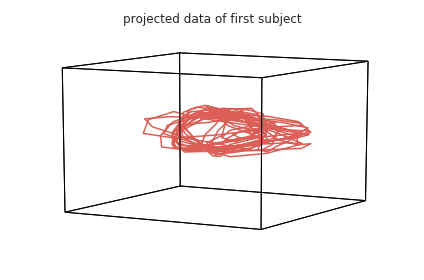

In [116]:
geo = hyp.plot(projected_dfs[0], title='projected data of first subject')

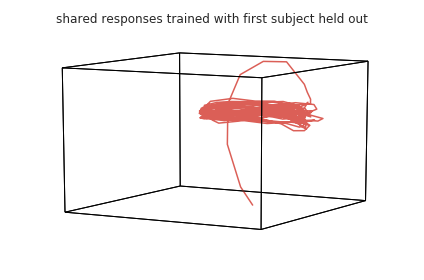

In [112]:
geo = hyp.plot(trained_srms_dfs[0], title='shared responses trained with first subject held out')

# Playground

## Compare different dimensionality reduction algorithms

reduce : str or dict
    Decomposition/manifold learning model to use.  Models supported: PCA,
    IncrementalPCA, SparsePCA, MiniBatchSparsePCA, KernelPCA, FastICA,
    FactorAnalysis, TruncatedSVD, DictionaryLearning, MiniBatchDictionaryLearning,
    TSNE, Isomap, SpectralEmbedding, LocallyLinearEmbedding, and MDS. Can be
    passed as a string, but for finer control of the model parameters, pass
    as a dictionary, e.g. reduce={'model' : 'PCA', 'params' : {'whiten' : True}}.
    See scikit-learn specific model docs for details on parameters supported
    for each model.

Default is IncrementalPCA

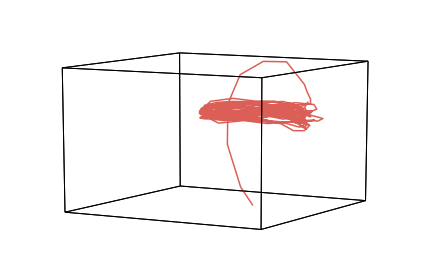

In [124]:
geo = hyp.plot(trained_srms_dfs[0], reduce='IncrementalPCA')

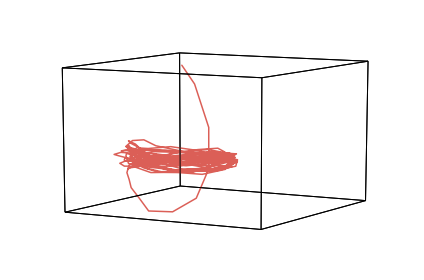

In [125]:
geo = hyp.plot(trained_srms_dfs[0], reduce='PCA')

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


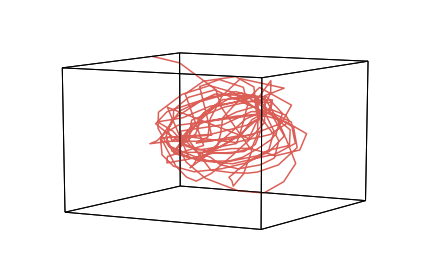

In [130]:
geo = hyp.plot(trained_srms_dfs[0], reduce='MDS')

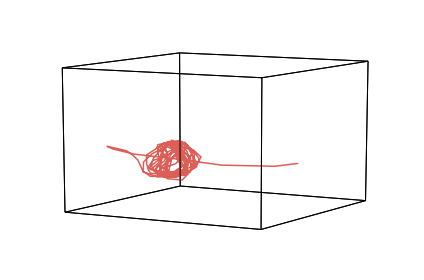

In [131]:
geo = hyp.plot(trained_srms_dfs[0], reduce='FastICA')

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()


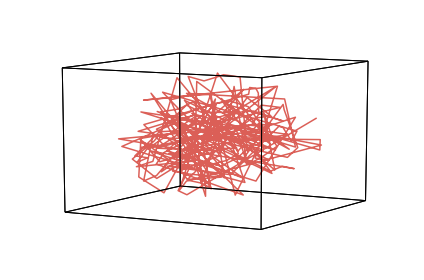

In [132]:
geo = hyp.plot(trained_srms_dfs[0], reduce='TSNE')

- Use MDS instead of PCA

In [91]:
# plot projected data trajectories

geo = hyp.plot(trained_srms_dfs[:4],
               size=[8,4], animate='parallel', frame_rate=10,
               tail_duration=1.,
               chemtrails=False,
               zoom=1.5,
               show=False)

anim = geo.line_ani
HTML(anim.to_html5_video())

/data/BnB_USER/oliver/somato/raw/venvs/somato_env/lib/python3.5/site-packages/hypertools/tools/df2mat.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  plot_data = df_num.as_matrix()
